In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

# Memanggil Dataset

In [ ]:
df = pd.read_csv('mobilbekas.csv')

# Deskripsi Dataset

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4999 non-null   object 
 1   year          4999 non-null   int64  
 2   price         4999 non-null   int64  
 3   transmission  4999 non-null   object 
 4   mileage       4999 non-null   int64  
 5   fuelType      4999 non-null   object 
 6   tax           4999 non-null   int64  
 7   mpg           4999 non-null   float64
 8   engineSize    4999 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 351.6+ KB


<Axes: >

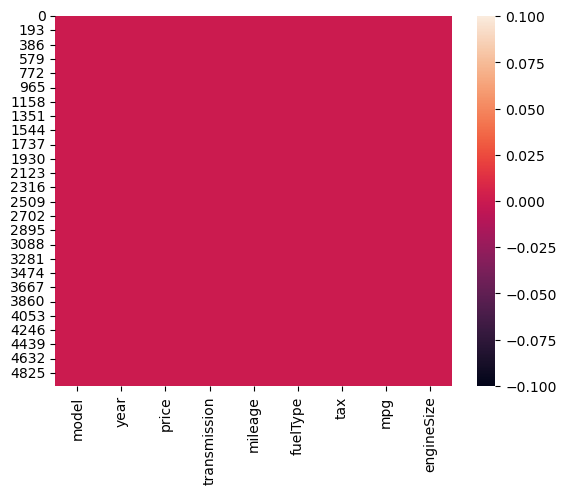

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2016.993799,17353.888978,23455.987798,118.892779,55.617964,1.770174
std,1.901054,9077.650932,18850.446493,62.764760,17.396318,0.583857
min,2001.000000,899.000000,4.000000,0.000000,1.100000,0.000000
25%,2016.000000,11260.000000,8910.000000,125.000000,47.900000,1.400000
50%,2017.000000,15498.000000,19218.000000,145.000000,55.400000,1.800000
75%,2019.000000,20995.000000,33188.500000,145.000000,61.700000,2.000000
max,2020.000000,84898.000000,140000.000000,570.000000,470.800000,5.000000


# Visualisasi Data

<Axes: >

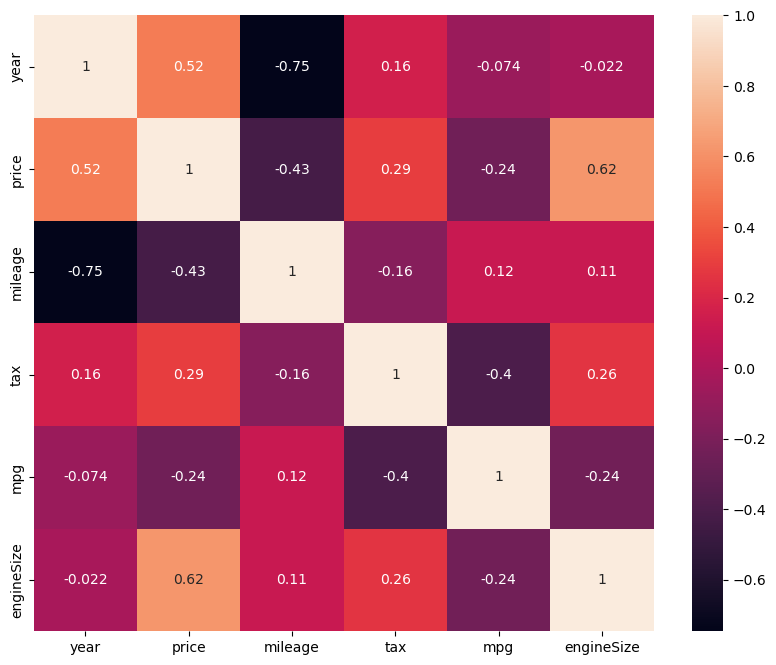

In [ ]:
df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah Mobil Berdasarkan Model

In [ ]:
df = pd.read_csv('mobilbekas.csv')

In [ ]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]),
 [Text(0, 0, ' Q8'),
  Text(1, 0, ' KA'),
  Text(2, 0, ' 8 Series'),
  Text(3, 0, ' X6'),
  Text(4, 0, ' i3'),
  Text(5, 0, ' S-MAX'),
  Text(6, 0, ' 6 Series'),
  Text(7, 0, ' X7'),
  Text(8, 0, ' Mustang'),
  Text(9, 0, ' A7'),
  Text(10, 0, ' Mondeo'),
  Text(11, 0, ' M4'),
  Text(12, 0, ' TT'),
  Text(13, 0, ' 7 Series'),
  Text(14, 0, ' X2'),
  Text(15, 0, ' A8'),
  Text(16, 0, ' B-MAX'),
  Text(17, 0, ' Edge'),
  Text(18, 0, ' X4'),
  Text(19, 0, ' I800'),
  Text(20, 0, ' Q7'),
  Text(21, 0, ' Ka+'),
  Text(22, 0, ' I40'),
  Text(23, 0, ' IX20'),
  Text(24, 0, ' Santa Fe'),
  Text(25, 0, ' IX35'),
  Text(26, 0, ' C-MAX'),
  Text(27, 0, ' X5'),
  Text(28, 0, ' X3'),
  Text(29, 0, ' Ioniq'),
  Text(30, 0, ' EcoSport'),
  Tex

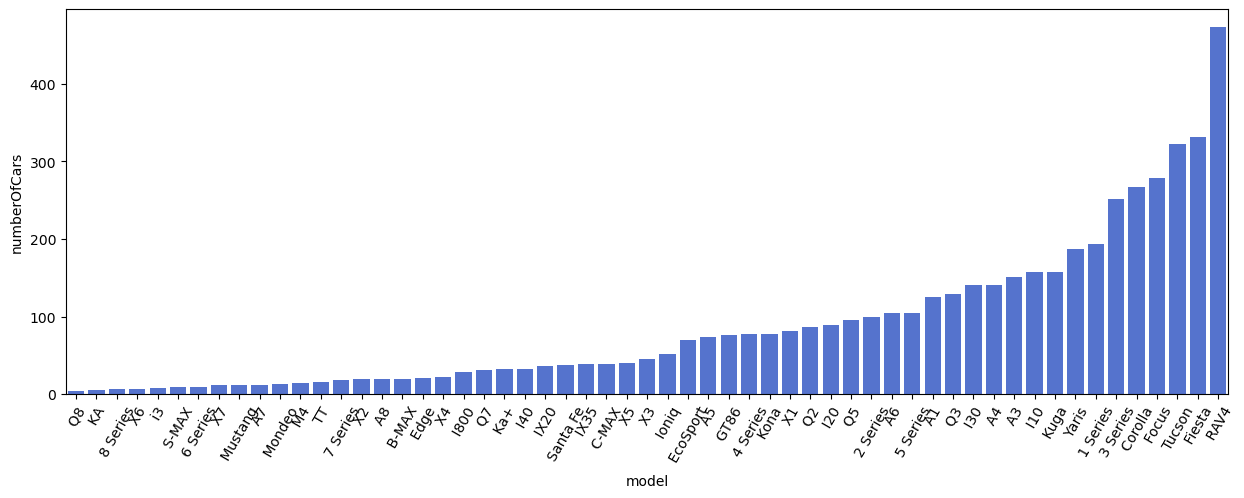

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

# Ukuran Mesin

In [ ]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

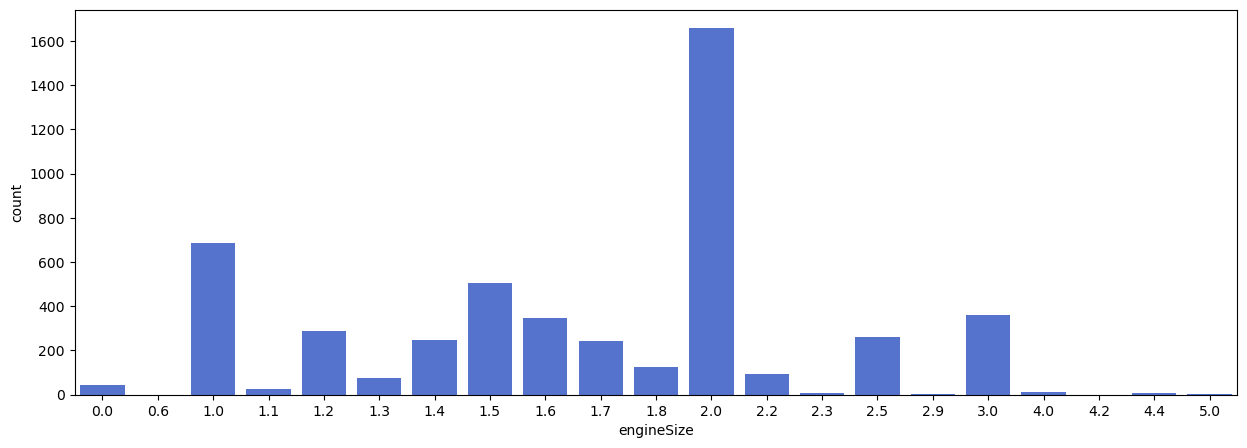

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

# Distribusi Mileage

<Axes: xlabel='mileage', ylabel='Count'>

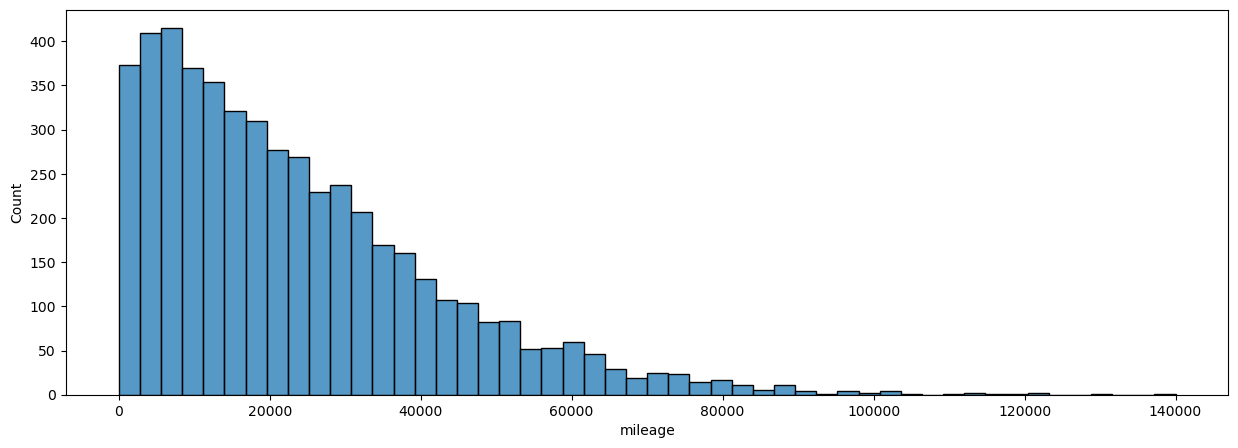

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(df['mileage'])

# Distribusi Harga Mobil

<Axes: xlabel='price', ylabel='Count'>

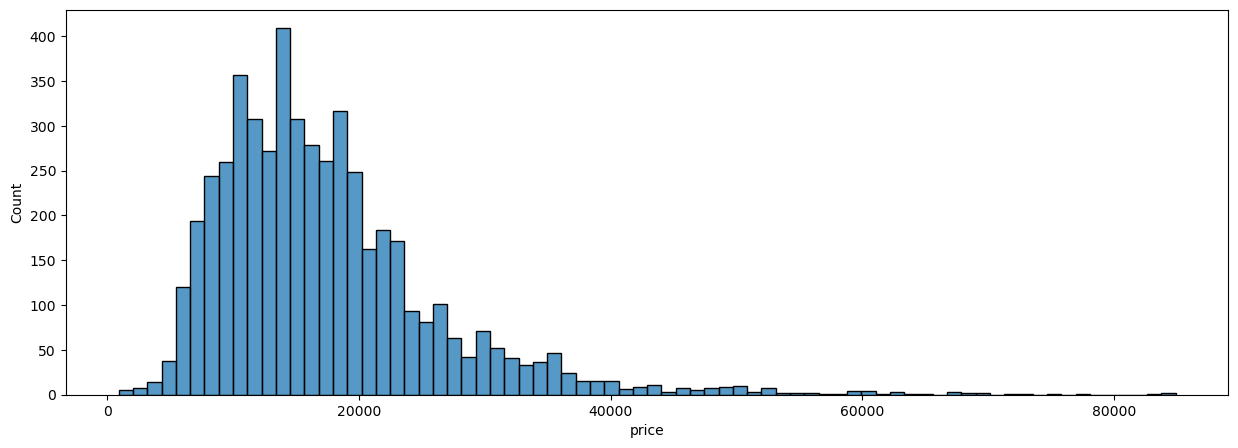

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(df['price'])

# Seleksi Fitur

In [ ]:
features = ['year','mileage','tax','mpg','engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((4999, 5), (4999,))

# Split Data Training Dan Data Testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1250,)

# Membuat Model Regresi Linier

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [ ]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.7158731457546209


# Membuat Inputan Model Regresi Linier

In [ ]:
#Year=2019, mileage=5000, tax=145, mpg=30.2, engineSize=2
input_data = np.array([[2019,5000,145,30.2,2]])

prediction = lr.predict(input_data)
print('Estimasi Harga Mobil Dalam EUR :', prediction)

exchange_rate = 17500

prediction_idr = prediction * exchange_rate
print('Estimasi Harga Mobil Dalam IDR :', prediction_idr)

Estimasi Harga Mobil Dalam EUR : [25552.57005603]
Estimasi Harga Mobil Dalam IDR : [4.47169976e+08]


C:\Users\Al Muzammil Imam\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Save Model

In [ ]:
import pickle

filename = 'prediksi_mobil.sav'
pickle.dump(lr,open(filename,'wb'))